In [1]:
import librosa
audio_path = 'old/v.mp3'
x3 , sr3 = librosa.load(audio_path)
x = x3
sr = sr3
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
x.shape

(98784,)

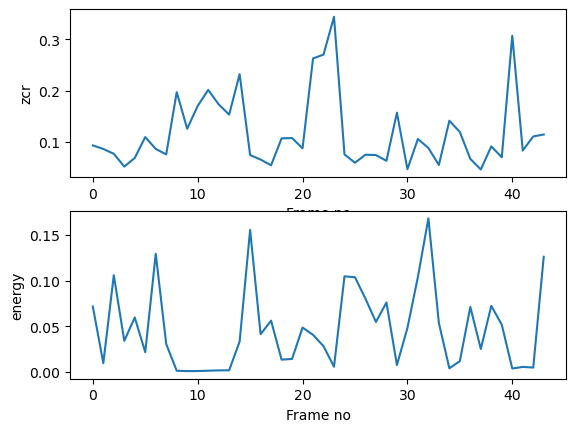

In [9]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
[Fs, x] = audioBasicIO.read_audio_file(audio_path)
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, int(0.1*Fs), int(0.1*Fs))
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [11]:
F.shape

(68, 44)

In [6]:
F.min()

-22.32241710868048

In [7]:
Fs

16000

In [8]:
0.116*Fs

1856.0

In [9]:
1/22050

4.5351473922902495e-05

In [10]:
0.5*Fs

8000.0

In [17]:
lff = librosa.feature.melspectrogram(y=x3, sr=sr3,n_fft=int(0.1*Fs),hop_length=int(0.1*Fs))
lff.shape

(128, 62)

In [14]:
F.shape

(68, 44)

In [15]:
lff.shape

(128, 25)

In [14]:
brick = np.zeros((128-68,96))

NameError: name 'np' is not defined

In [ ]:
brick.shape

(60, 96)

In [ ]:
cc = np.vstack((brick,F))

In [ ]:
cc.shape

(128, 96)

In [ ]:
c.shape

(324, 352)

In [ ]:
import numpy as np

In [ ]:
emb = np.vstack((F,lff))

In [ ]:
emb.shape

In [ ]:
F.min()

In [ ]:
F.max()

In [ ]:
lff.min()

In [ ]:
lff.max()

In [ ]:
cc.shape

(128, 96)

In [ ]:
lff.shape

(128, 133)

In [ ]:
emb = np.hstack((cc,lff))

In [ ]:
emb.shape

(128, 229)

In [ ]:
d= np.rot90(emb)

In [ ]:
d.shape

(229, 128)

In [ ]:
F

array([[ 7.53844231e-02,  7.70096262e-02,  1.18889861e-01, ...,
         8.92611576e-02,  7.87598450e-02,  1.27890986e-01],
       [ 5.62096789e-02,  6.18985294e-02,  3.67719749e-02, ...,
         4.68803028e-02,  4.64632458e-02,  2.96203499e-02],
       [ 2.87671854e+00,  2.89041271e+00,  2.03962190e+00, ...,
         2.55026905e+00,  2.91230492e+00,  2.49292326e+00],
       ...,
       [ 0.00000000e+00,  3.34836703e-03,  1.39219881e-03, ...,
         1.69697868e-03,  2.76364650e-02,  3.09143952e-03],
       [ 0.00000000e+00,  5.88710359e-04, -7.03623667e-03, ...,
        -3.66143414e-02,  2.48077342e-02, -1.09841304e-02],
       [ 0.00000000e+00,  7.05549515e-04,  1.33107148e-03, ...,
        -5.53365469e-03,  4.80238339e-03, -8.94567533e-04]])

In [16]:
import numpy as np

In [ ]:
a2D = np.array([[1, 2], [3, 4]])

In [ ]:
lff.shape

(128, 25)

In [ ]:
lff[1]

array([ 7.905496 , 10.5623045, 20.472239 , 14.192144 ,  9.0893   ,
       13.51244  , 14.0014925, 25.119795 , 52.26613  ,  4.8581166,
        3.2871306,  6.3394814,  8.594288 ,  8.636654 , 10.212639 ,
        6.556416 , 14.991695 , 13.222608 ,  5.028929 ,  8.142223 ,
       12.235821 , 27.563248 , 14.720246 , 16.87833  , 36.956398 ],
      dtype=float32)

In [17]:
d= np.transpose(lff).shape
d

(25, 128)

In [2]:
import numpy as np
z = np.ones((190,128))

In [ ]:
z1 = np.zeros((190,768-128))

In [18]:
import speechbrain as sb
import torchaudio
from speechbrain.pretrained import EncoderClassifier
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")
classifierLang = EncoderClassifier.from_hparams(source="speechbrain/lang-id-commonlanguage_ecapa", savedir="pretrained_models/lang-id-commonlanguage_ecapa")
signal, fs = torchaudio.load('old/v.mp3')
embeddings = classifier.encode_batch(signal)

/home/gamal/anaconda3/envs/ds2f_pre/lib/python3.8/site-packages/torch/functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:862.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


In [19]:
embeddings.shape

torch.Size([1, 1, 192])